In [1]:
#!/usr/bin/env python

# --------------------------------------------------------
# Tensorflow Faster R-CNN
# Licensed under The MIT License [see LICENSE for details]
# Written by Xinlei Chen, based on code from Ross Girshick
# --------------------------------------------------------

"""
Demo script showing detections in sample images.

See README.md for installation instructions before running.
"""
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import _init_paths

from model.config import cfg
from model.test import im_detect
from model.nms_wrapper import nms

from utils.timer import Timer
import matplotlib.pyplot as plt
import numpy as np
import os, cv2
import argparse

from nets.vgg16 import vgg16
from nets.resnet_v1 import resnetv1

import torch

from os import listdir
from os.path import isfile, join

CLASSES = ('__background__',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor')

NETS = {'vgg16': ('vgg16_faster_rcnn_iter_%d.pth',),'res101': ('res101_faster_rcnn_iter_%d.pth',)}
DATASETS= {'pascal_voc': ('voc_2007_trainval',),'pascal_voc_0712': ('voc_2007_trainval+voc_2012_trainval',)}


In [2]:
def vis_detections(im, class_name, dets, thresh=0.5):
    """Draw detected bounding boxes."""
    inds = np.where(dets[:, -1] >= thresh)[0]
    if len(inds) == 0:
        return

    im = im[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(im, aspect='equal')
    for i in inds:
        bbox = dets[i, :4]
        score = dets[i, -1]

        ax.add_patch(
            plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False,
                          edgecolor='red', linewidth=3.5)
            )
        ax.text(bbox[0], bbox[1] - 2,
                '{:s} {:.3f}'.format(class_name, score),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')

    ax.set_title(('{} detections with '
                  'p({} | box) >= {:.1f}').format(class_name, class_name,
                                                  thresh),
                  fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.draw()


In [3]:
def demo(net, image_name):
    """Detect object classes in an image using pre-computed object proposals."""

    # Load the demo image
    #im_file = os.path.join(cfg.DATA_DIR, 'demo', image_name)
    im_file = os.path.join(cfg.DATA_DIR, 'VOCdevkit2007', 'VOC2007', 'ImageSets', 'Main', image_name)
    im = cv2.imread(im_file)
    print('Demo for {}'.format(im_file))


    # Detect all object classes and regress object bounds
    timer = Timer()
    timer.tic()
    scores, boxes = im_detect(net, im)
    timer.toc()
    print('Detection took {:.3f}s for {:d} object proposals'.format(timer.total_time(), boxes.shape[0]))

    # Visualize detections for each class
    CONF_THRESH = 0.7
    NMS_THRESH = 0.3
    for cls_ind, cls in enumerate(CLASSES[1:]):
        cls_ind += 1 # because we skipped background
        cls_boxes = boxes[:, 4*cls_ind:4*(cls_ind + 1)]
        cls_scores = scores[:, cls_ind]
        dets = np.hstack((cls_boxes,
                          cls_scores[:, np.newaxis])).astype(np.float32)
        keep = nms(torch.from_numpy(dets), NMS_THRESH)
        dets = dets[keep.numpy(), :]
        vis_detections(im, cls, dets, thresh=CONF_THRESH)

In [4]:
demonet = 'vgg16' # Network to use [vgg16 res101]
dataset = 'pascal_voc' # Trained dataset [pascal_voc pascal_voc_0712]

In [8]:
torch.cuda.set_device(1)
modelPath = '../output/vgg16/barcharts_2018_trainval/default/vgg16_faster_rcnn_iter_130000.pth'
if True:
    cfg.TEST.HAS_RPN = True  # Use RPN for proposals
    saved_model = modelPath # 4-class{back, tit, xla, yla}
    CLASSES = ('__background__', 'title', 'xlabel', 'ylabel',  'xticks', 'yticks', 'legends', 'bars')
    '''
    saved_model = '../../project2018/test1/vgg16_faster_rcnn_iter_40000.pth' # 3-class{back, text, ylabel}
    CLASSES = ('__background__', 'text', 'ylabel')
    '''

    if not os.path.isfile(saved_model):
        raise IOError(('{:s} not found.\nDid you download the proper networks from '
                       'our server and place them properly?').format(saved_model))

    # load network
    if demonet == 'vgg16':
        net = vgg16()
    elif demonet == 'res101':
        net = resnetv1(num_layers=101)
    else:
        raise NotImplementedError
    net.create_architecture(len(CLASSES), tag='default', anchor_scales=[1, 4, 8, 16, 32], 
                            anchor_ratios=(0.2,0.5,1,2,5), test_mode=True)

number of anchors =  25
/izola/xyl/pytorch-faster-rcnn/tools/../lib/nets/network.py


In [9]:
state_dict = torch.load(modelPath)

from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():    
    name = k.replace('module.','') #[7:] # remove `module.`
    #print(name)
    new_state_dict[name] = v
net.load_state_dict(new_state_dict)

In [10]:
state_dict = torch.load()


net.load_state_dict(state_dict)

FileNotFoundError: [Errno 2] No such file or directory: '../output/vgg16/barcharts_2018_trainval/default/vgg16_faster_rcnn_iter_20000.pth'

In [11]:
def vis_detections1(ax, im, class_name, dets, thresh=0.5):
    """Draw detected bounding boxes."""
    inds = np.where(dets[:, -1] >= thresh)[0]
    if len(inds) == 0:
        return


    for i in inds:
        bbox = dets[i, :4]
        score = dets[i, -1]

        ax.add_patch(
            plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False,
                          edgecolor='red', linewidth=3.5)
            )
        ax.text(bbox[0], bbox[1] - 2,
                '{:s} {:.3f}'.format(class_name, score),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')
    '''
    ax.set_title(('{} detections with '
                  'p({} | box) >= {:.1f}').format(class_name, class_name,
                                                  thresh),   fontsize=14)    
    '''
    
    
    '''
    plt.axis('off')
    plt.tight_layout()
    plt.draw()
    '''


In [12]:
def demo1(net, image_name, CONF_THRESH = 0.7):
    """Detect object classes in an image using pre-computed object proposals."""

    # Load the demo image
    #im_file = os.path.join(cfg.DATA_DIR, 'demo', image_name)
    #im_file = os.path.join(cfg.DATA_DIR, 'VOCdevkit2007', 'VOC2007', 'JPEGImages', image_name)
    
    #im_file = '/home/xliu/checkImageFromGoogle/bs1.png'
    
    #im_file = '/home/xliu/pytorch-faster-rcnn/KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/semi_equipment_materials.jpg'
    im_file = image_name
    im = cv2.imread(im_file)
    print('Demo for {}'.format(im_file))


    # Detect all object classes and regress object bounds
    timer = Timer()
    timer.tic()
    scores, boxes = im_detect(net, im)
    timer.toc()
    print('Detection took {:.3f}s for {:d} object proposals'.format(timer.total_time(), boxes.shape[0]))

    # Visualize detections for each class
    im = im[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(im, aspect='equal')
    NMS_THRESH = 0.3
    for cls_ind, cls in enumerate(CLASSES[1:]):
    #for cls_ind, cls in enumerate(CLASSES[0:]):
        cls_ind += 1 # because we skipped background
        cls_boxes = boxes[:, 4*cls_ind:4*(cls_ind + 1)]
        cls_scores = scores[:, cls_ind]
        dets = np.hstack((cls_boxes,
                          cls_scores[:, np.newaxis])).astype(np.float32)
        keep = nms(torch.from_numpy(dets), NMS_THRESH)
        dets = dets[keep.numpy(), :]

        vis_detections1(ax, im, cls, dets, thresh=CONF_THRESH)
    plt.axis('off')
    plt.tight_layout()
    plt.draw()

In [13]:
for cls_ind, cls in enumerate(CLASSES[0:]):
    print(cls_ind, cls)

0 __background__
1 title
2 xlabel
3 ylabel
4 xticks
5 yticks
6 legends
7 bars


In [14]:
net = net.cuda()
    
    #im_names = ['000456.jpg', '000542.jpg', '001150.jpg',
    #            '001763.jpg', '004545.jpg']
im_names = ['1.jpg']
mypath = '../data/VOCdevkit2018/barcharts2018/JPEGImages/'
im_names = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]
#im_names = 
for im_name in im_names[:10]:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    #print('Demo for data/demo/{}'.format(im_name))
    try:
        demo1(net, im_name, CONF_THRESH = 0.3)
        plt.show()
    except:
        print("Type Unsupported")
    #plt.show()

KeyboardInterrupt: 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/A-FEA-result-of-package-warpage-for-UFA-at-40C.ppm


/izola/xyl/pytorch-faster-rcnn/tools/../lib/nets/network.py:359: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  rpn_cls_prob_reshape = F.softmax(rpn_cls_score_reshape)
/izola/xyl/pytorch-faster-rcnn/tools/../lib/nets/network.py:396: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  cls_prob = F.softmax(cls_score)


Detection took 1.883s for 300 object proposals


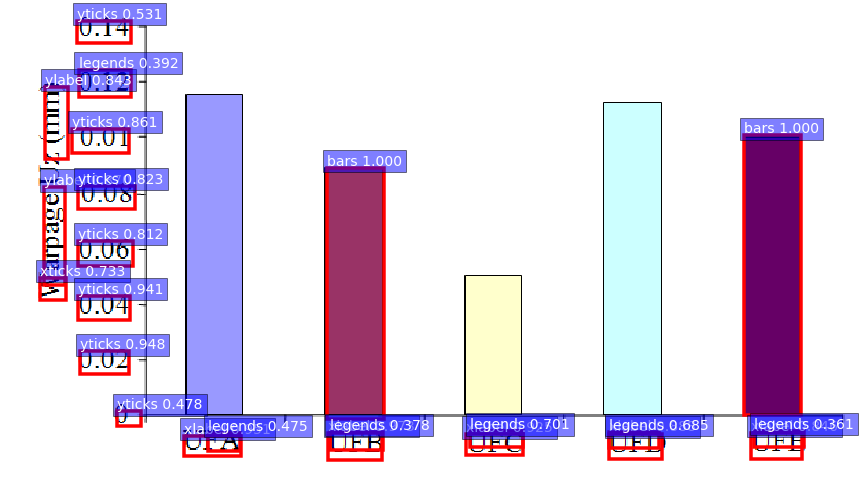

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/cdnfig2.jpg
Detection took 0.438s for 300 object proposals


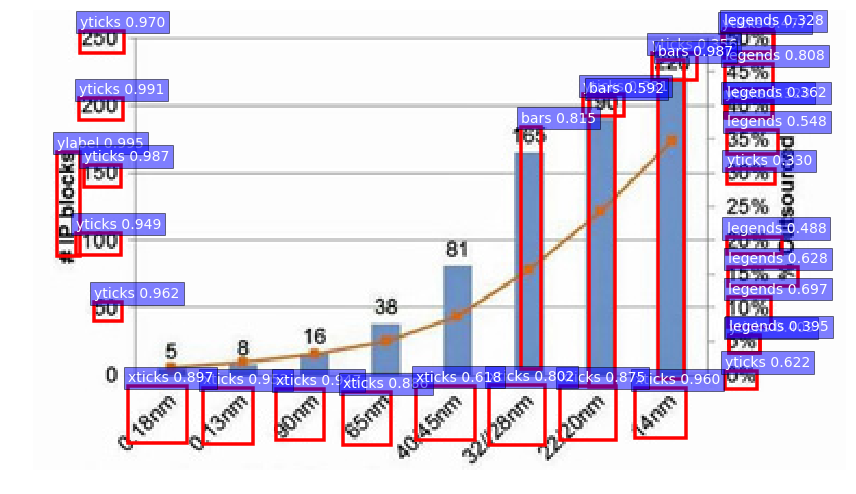

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/DRAM_chart.gif
Type Unsupported
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/images (11).png
Detection took 0.421s for 300 object proposals


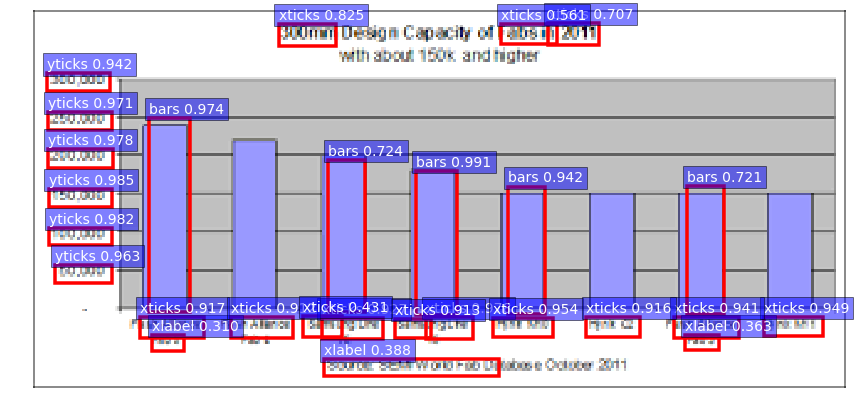

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/images (7).png
Detection took 0.418s for 300 object proposals


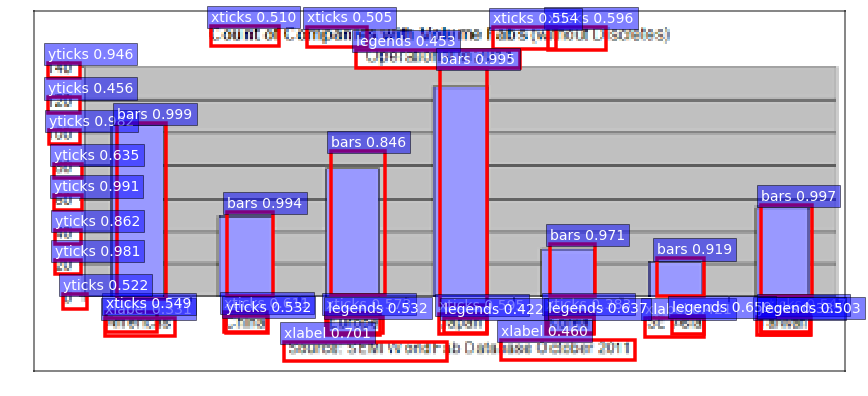

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/IPC_graph55873.jpg
Detection took 0.435s for 300 object proposals


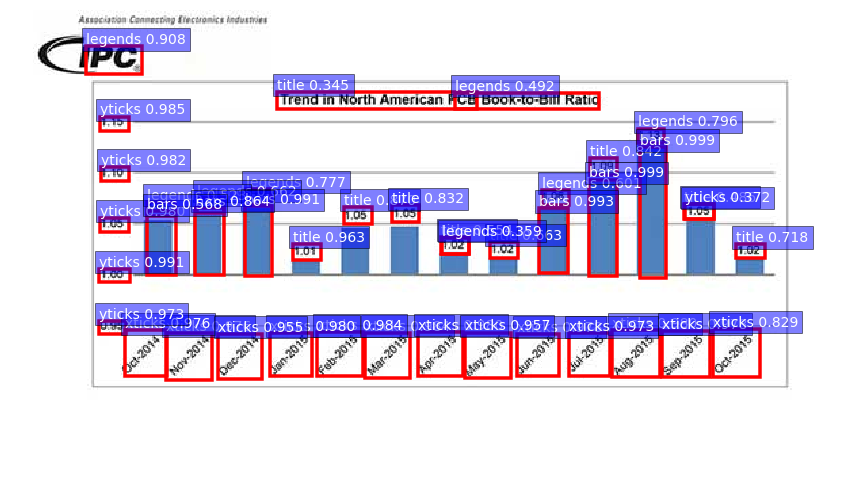

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/j_polyeng-2017-0347_fig_008.jpg
Detection took 0.438s for 300 object proposals


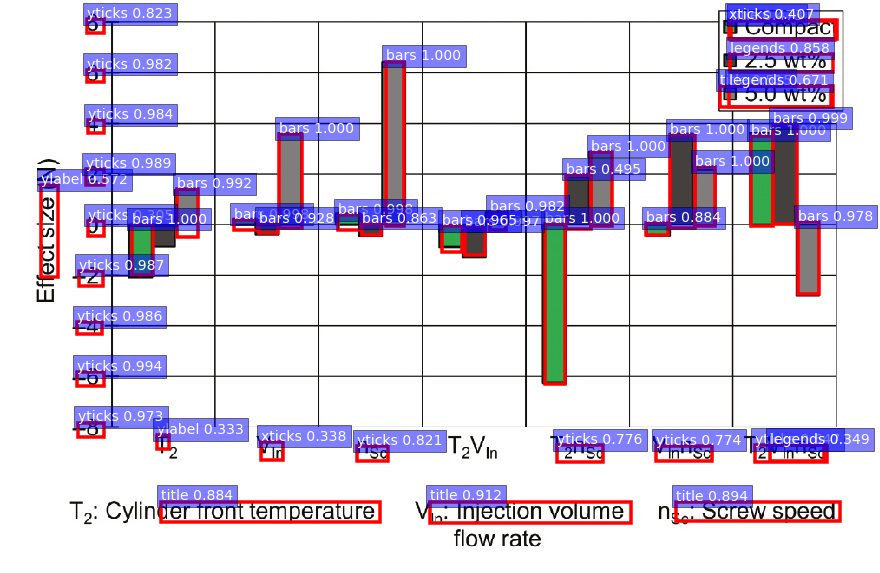

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/RF-Fig-1.png
Detection took 0.449s for 300 object proposals


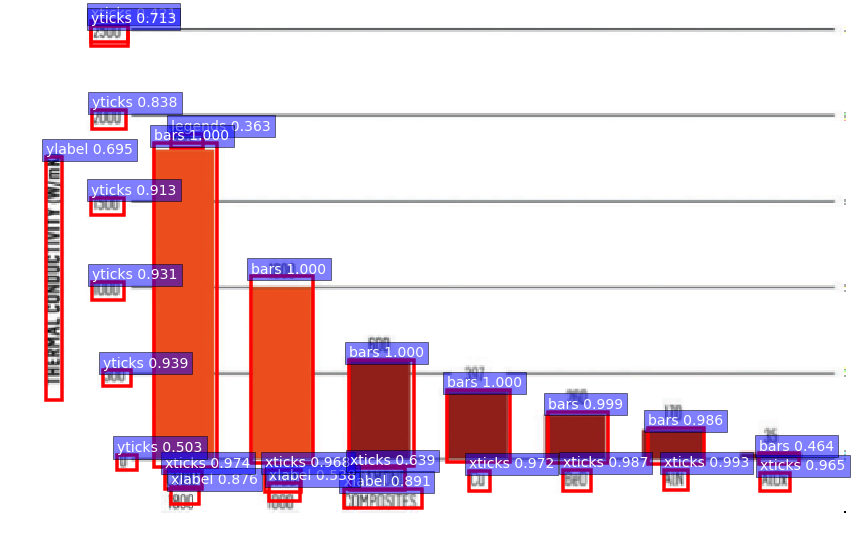

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/semi_equipment_materials.jpg
Detection took 0.440s for 300 object proposals


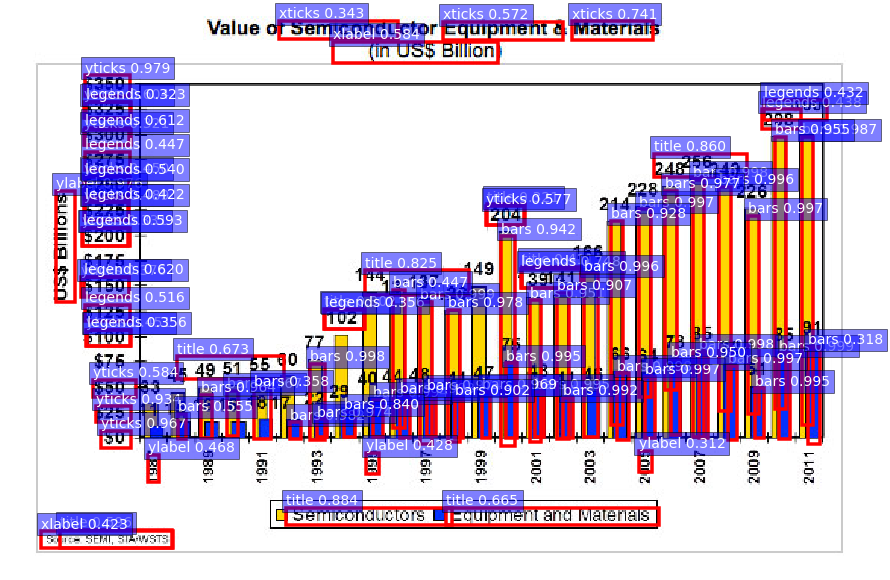

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/smart phone suppliers.jpg
Detection took 0.436s for 300 object proposals


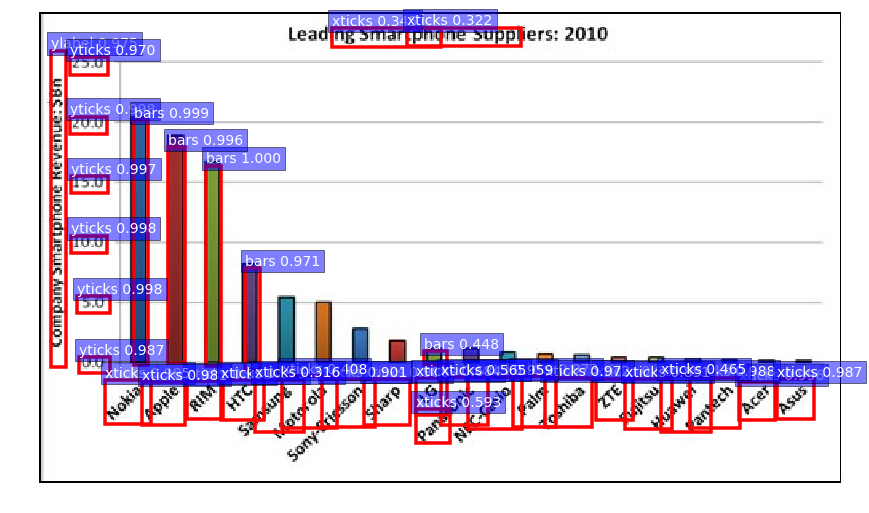

In [15]:
net = net.cuda()

mypath = '../KNOWLEDGE_FROM_CHARTS/SEMICON_BARS/'
im_names = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]
for im_name in im_names[:10]:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    try:
        demo1(net, im_name, CONF_THRESH = 0.3)
        plt.show()
    except:
        print("Type Unsupported")

In [16]:
net

vgg16(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
      (5): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
      (10): Conv2d (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../data/VOCdevkit2018/barcharts2018/JPEGImages/10000.jpg

/izola/xyl/pytorch-faster-rcnn/tools/../lib/nets/network.py:322: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  rpn_cls_prob_reshape = F.softmax(rpn_cls_score_reshape)
/izola/xyl/pytorch-faster-rcnn/tools/../lib/nets/network.py:359: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  cls_prob = F.softmax(cls_score)



Variable containing:

Columns 0 to 9 
 0.0012  0.0012  0.0987  0.0696  0.0618  0.0417  0.0383  1.0632  1.1658  0.0439

Columns 10 to 19 
 0.0531  0.0012  0.5379  0.9553  0.0038  1.1967  0.0012  0.1268  0.8795  0.0211

Columns 20 to 29 
 0.0125  0.0012  0.0012  0.0012  1.1068  0.0012  0.0095  0.0193  0.0221  0.0012

Columns 30 to 39 
 0.0012  0.0012  0.0012  0.0012  0.0012  0.4343  1.0674  0.0012  0.0106  0.5755

Columns 40 to 49 
 0.0382  0.0012  0.7230  0.0012  1.6797  2.0392  0.1920  0.0012  1.1748  0.0012

Columns 50 to 59 
 0.0012  0.0596  0.1938  0.0012  0.0012  0.8807  0.0012  0.0012  0.6907  0.1629

Columns 60 to 69 
 0.0012  0.0012  0.0012  0.0804  1.9942  0.0012  0.1775  0.0012  0.0012  0.0012

Columns 70 to 79 
 0.7575  0.0012  0.0301  1.9698  0.4978  0.0247  0.1196  0.0012  0.0012  0.2012

Columns 80 to 89 
 0.0012  0.5469  0.0486  0.0012  0.0012  0.0012  0.0012  0.0012  0.0916  0.1853

Columns 90 to 99 
 0.5237  0.0012  0.1446  1.7524  0.0012  0.1715  0.0012  0.1370  0.001

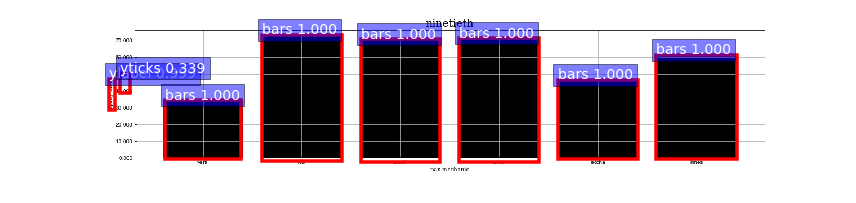

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../data/VOCdevkit2018/barcharts2018/JPEGImages/10001.jpg
Variable containing:

Columns 0 to 9 
 0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012

Columns 10 to 19 
 0.0012  0.0012  0.0012  0.0443  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012

Columns 20 to 29 
 0.0012  0.0012  1.1358  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0158

Columns 30 to 39 
 0.0012  0.5097  0.0012  0.0012  0.0012  0.4137  0.0012  0.0012  0.0012  0.0012

Columns 40 to 49 
 0.0012  1.1390  0.0012  0.0012  0.0012  0.5959  0.0739  0.0012  0.0012  0.0012

Columns 50 to 59 
 0.7126  0.0012  0.6852  0.0012  0.0012  0.0012  1.2877  2.0848  0.0012  0.0012

Columns 60 to 69 
 0.0012  0.5842  1.9244  0.0012  0.0012  0.0012  0.2949  0.7867  1.7691  0.0012

Columns 70 to 79 
 0.0012  0.0428  0.0012  1.7522  0.0012  0.0341  0.0787  0.0012  0.1197  0.0012

Columns 80 to 89 
 0.0012  0.0012  0.0012  0.1902  0.0012  0.0012  0.0012  1.3853  0.0

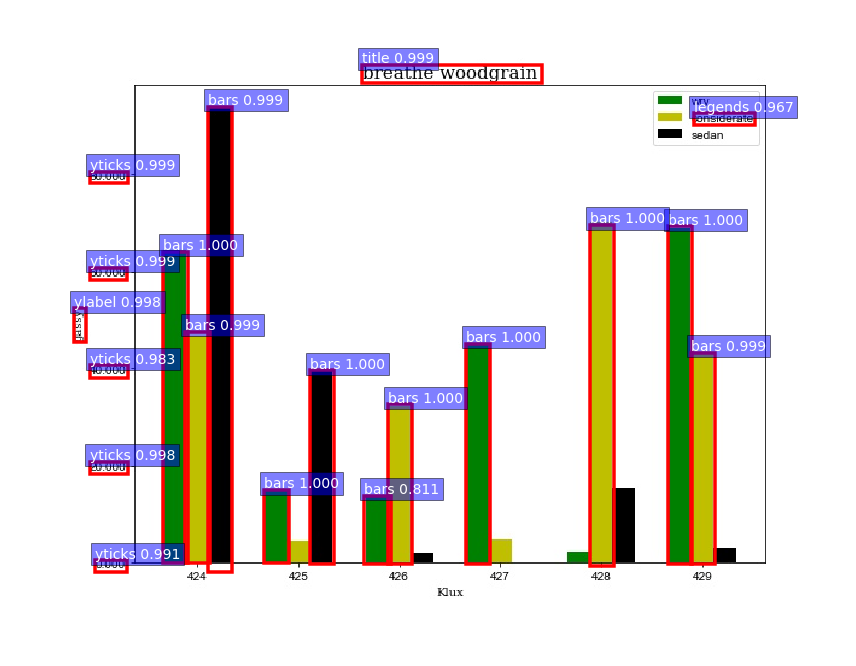

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../data/VOCdevkit2018/barcharts2018/JPEGImages/10002.jpg
Variable containing:

Columns 0 to 9 
 0.0012  0.0012  0.0012  0.3836  0.0012  0.0012  0.0684  0.0704  0.0012  0.5557

Columns 10 to 19 
 0.3670  0.4239  0.0012  0.1089  1.7787  0.0523  0.0012  0.0012  0.0672  0.1269

Columns 20 to 29 
 0.0670  0.2851  0.1571  0.0012  0.0531  0.0012  0.0012  0.5644  0.1048  0.0738

Columns 30 to 39 
 0.5256  0.0462  0.0012  0.0012  0.0448  0.0787  0.2212  0.0278  0.0012  0.0012

Columns 40 to 49 
 0.0012  0.0012  0.0018  0.6413  0.0012  0.1217  0.0012  0.0247  0.0012  0.1395

Columns 50 to 59 
 0.0012  0.4719  0.0702  0.0012  0.0912  0.2423  0.2481  0.1264  0.3014  0.0043

Columns 60 to 69 
 0.0012  0.0012  0.0012  0.0012  0.0012  1.5380  0.0012  0.0012  0.5113  0.0232

Columns 70 to 79 
 0.8798  0.6802  0.9483  0.0012  0.0269  0.0012  0.0012  0.7490  0.0012  0.1671

Columns 80 to 89 
 0.0012  0.9353  0.1576  0.3111  0.0012  0.0012  0.4205  0.0012  0.0

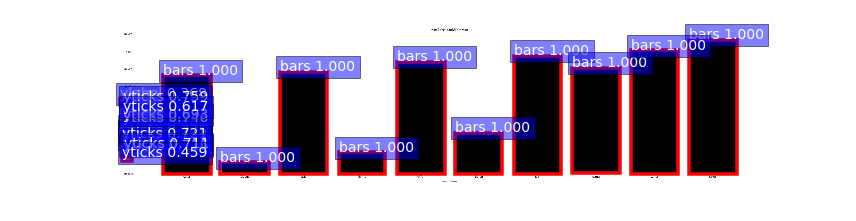

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../data/VOCdevkit2018/barcharts2018/JPEGImages/10003.jpg
Variable containing:

Columns 0 to 9 
 1.0813  0.7240  1.5216  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012

Columns 10 to 19 
 0.0012  0.2161  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012

Columns 20 to 29 
 0.0012  0.1063  0.0012  0.0012  0.0012  0.0322  0.0012  0.8357  0.0012  0.0012

Columns 30 to 39 
 0.0012  0.0012  0.0012  0.5784  1.3924  0.0261  0.0012  0.0012  0.0012  0.4192

Columns 40 to 49 
 0.0012  0.0134  0.0012  0.0408  0.0012  0.4040  0.0012  1.6712  0.0217  0.0012

Columns 50 to 59 
 0.0012  0.0012  0.0012  0.0012  0.0012  0.4519  0.0057  0.0012  0.0012  0.0012

Columns 60 to 69 
 0.2309  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0194  1.9375

Columns 70 to 79 
 0.0012  0.0012  0.0174  0.0012  0.0318  0.0012  0.0012  0.0012  0.0012  0.0012

Columns 80 to 89 
 0.0012  0.0630  0.0012  1.9810  0.0012  0.2044  0.0012  0.4961  0.0

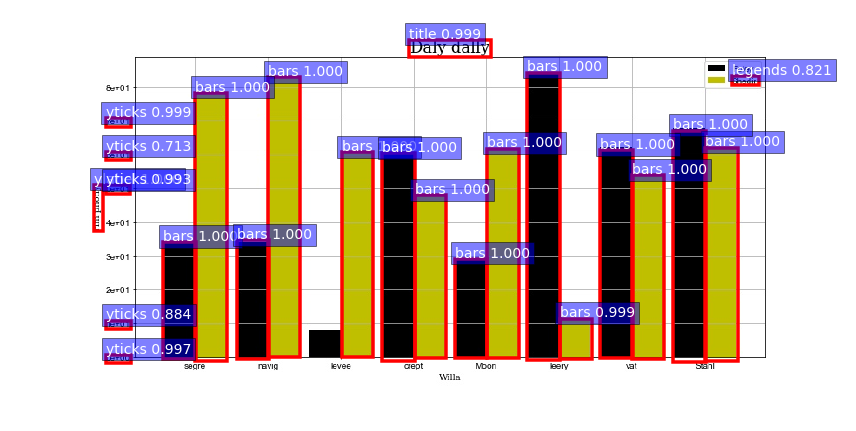

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../data/VOCdevkit2018/barcharts2018/JPEGImages/10004.jpg
Variable containing:

Columns 0 to 9 
 0.0383  0.0622  0.0325  0.1253  0.1051  0.9805  0.0360  0.0894  0.0393  0.0012

Columns 10 to 19 
 0.0400  0.0012  0.3262  0.0012  0.0012  0.2561  0.8810  0.0785  0.2878  1.7277

Columns 20 to 29 
 1.1183  0.0012  0.0012  0.0012  1.3288  0.0012  0.1424  0.0012  0.0178  0.1716

Columns 30 to 39 
 0.0012  0.0012  0.0012  0.0111  0.0012  0.0012  0.0012  0.0012  0.1517  0.2347

Columns 40 to 49 
 0.5818  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0155  0.0012

Columns 50 to 59 
 0.0012  0.2696  0.0012  0.0354  0.0273  0.5883  0.0559  0.0012  0.0012  0.5104

Columns 60 to 69 
 0.0617  0.0012  0.0012  0.0012  0.0076  0.0012  1.0190  0.0012  0.0012  0.0012

Columns 70 to 79 
 0.0310  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012

Columns 80 to 89 
 0.9230  0.5660  0.0012  0.0012  0.0012  0.3254  0.0012  0.0012  0.0

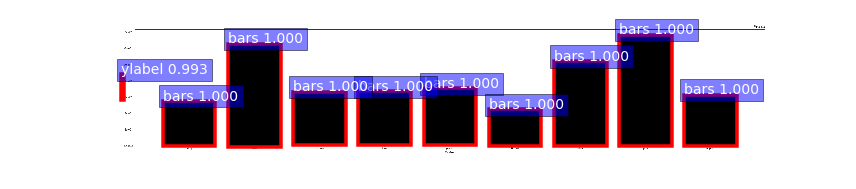

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../data/VOCdevkit2018/barcharts2018/JPEGImages/10005.jpg
Variable containing:

Columns 0 to 9 
 0.0012  0.0012  0.0012  0.0012  0.0012  0.0503  0.0012  0.0012  0.0070  0.0012

Columns 10 to 19 
 0.6760  0.0336  0.0748  0.2116  0.0012  0.0012  0.1628  0.0012  0.0012  0.0012

Columns 20 to 29 
 0.3661  0.0012  0.0012  0.0012  0.0012  1.6116  0.0012  0.0012  0.0339  0.0012

Columns 30 to 39 
 0.0012  0.0012  0.1255  0.0012  0.0012  0.0012  0.0012  0.0196  0.0012  0.0012

Columns 40 to 49 
 1.4777  0.4271  0.1427  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012

Columns 50 to 59 
 0.0012  0.0012  0.0012  0.2560  0.3818  0.0012  0.0012  0.3760  0.0012  0.0957

Columns 60 to 69 
 0.0012  0.0012  0.0012  0.0012  0.0012  0.0360  0.3213  0.1317  0.0012  0.0012

Columns 70 to 79 
 0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.1183

Columns 80 to 89 
 1.2445  0.0012  0.0012  0.0012  0.3047  0.0012  0.0012  0.0012  0.1

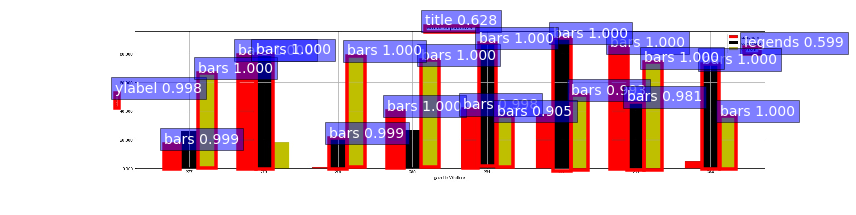

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../data/VOCdevkit2018/barcharts2018/JPEGImages/10006.jpg
Variable containing:

Columns 0 to 9 
 0.0012  0.0012  0.0349  0.1196  1.6691  0.2579  0.2696  0.0012  0.0012  0.0012

Columns 10 to 19 
 0.0012  0.0012  0.0012  0.1121  0.0012  0.0012  0.0012  0.0012  0.0459  0.1122

Columns 20 to 29 
 0.0012  0.8512  0.0012  0.0012  0.0012  0.2193  2.4524  0.0012  0.0012  0.0012

Columns 30 to 39 
 0.0012  0.0012  0.0830  0.0012  0.4650  0.0012  0.0012  0.5984  0.0012  0.3246

Columns 40 to 49 
 0.0538  0.0012  0.0012  0.0012  0.0071  0.0012  0.0072  0.1867  0.0012  0.0012

Columns 50 to 59 
 0.0012  0.2855  0.5222  0.0012  0.0084  0.0238  0.0057  0.0012  0.0012  0.2515

Columns 60 to 69 
 0.0012  0.0012  0.0012  0.4648  0.0012  0.0012  0.3442  0.1806  0.0012  0.0012

Columns 70 to 79 
 0.0663  1.8002  0.0609  0.0012  0.0012  0.0012  0.0012  0.0453  0.6245  0.0012

Columns 80 to 89 
 0.0012  0.1020  0.0240  0.0012  0.0012  0.2066  0.0012  0.0012  0.0

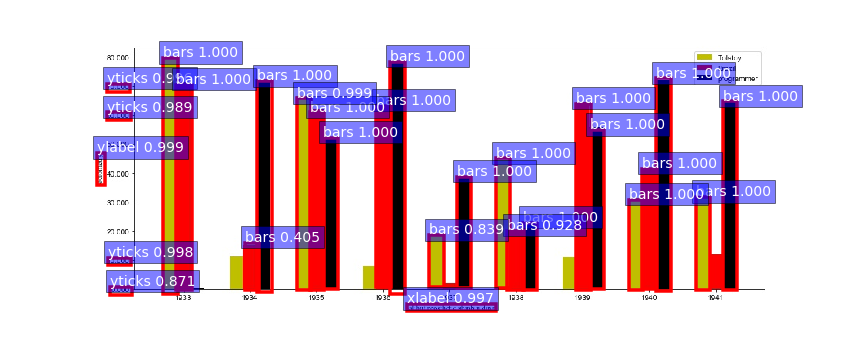

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../data/VOCdevkit2018/barcharts2018/JPEGImages/10007.jpg
Variable containing:

Columns 0 to 9 
 0.1080  0.0012  0.1052  0.3231  0.5269  0.0012  0.0012  1.4306  0.2033  0.0293

Columns 10 to 19 
 0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.4648  0.0012  0.0012  0.0012

Columns 20 to 29 
 0.0012  0.0012  0.3048  0.0012  0.0012  0.0012  0.0784  0.0124  0.0012  0.9273

Columns 30 to 39 
 0.5605  0.0012  0.6294  0.0012  0.0181  0.0012  0.0012  0.0012  0.3956  0.0012

Columns 40 to 49 
 0.0012  0.0012  0.0680  0.0012  0.0167  0.0012  0.0012  0.0012  0.0012  0.0447

Columns 50 to 59 
 0.5164  0.0218  0.0012  0.0012  0.0238  0.1090  0.8629  0.0012  0.0012  0.0012

Columns 60 to 69 
 0.0072  0.0012  0.0428  0.0012  0.4851  0.0012  0.0119  0.0012  0.0012  0.0012

Columns 70 to 79 
 0.0012  0.1515  0.0012  0.0012  0.2393  0.0012  0.0012  0.0012  0.0012  0.0012

Columns 80 to 89 
 0.0012  0.0012  0.0012  0.0268  0.0291  0.0012  0.0012  0.5932  0.0

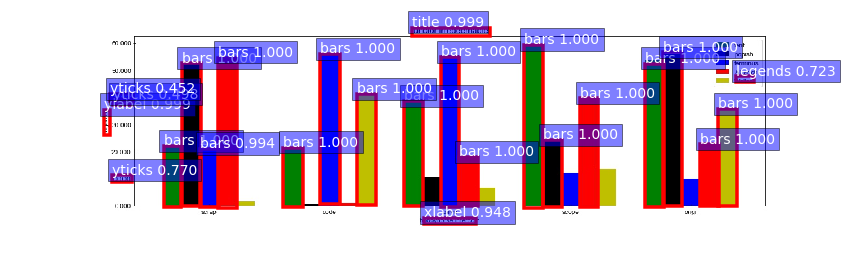

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../data/VOCdevkit2018/barcharts2018/JPEGImages/10008.jpg
Variable containing:

Columns 0 to 9 
 0.5365  0.0044  0.0012  0.0012  0.5105  0.3965  0.0012  0.0012  0.1358  0.0012

Columns 10 to 19 
 0.0012  0.0012  0.0099  0.0096  0.2831  0.0640  2.1894  0.0012  0.2028  0.0012

Columns 20 to 29 
 0.0012  0.0012  0.0012  0.0216  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012

Columns 30 to 39 
 0.0127  0.2237  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012

Columns 40 to 49 
 0.0855  0.0012  0.0012  0.0012  0.0012  0.0012  0.0154  0.0012  0.0012  0.0012

Columns 50 to 59 
 0.0731  0.0809  0.0012  1.1492  0.0012  0.0118  0.0012  0.0012  0.0012  0.1967

Columns 60 to 69 
 0.2326  1.1993  0.0012  0.1027  0.0012  0.0978  0.1514  0.0012  0.0012  0.0012

Columns 70 to 79 
 0.0012  0.0012  0.0012  0.0012  1.3288  0.1671  0.0903  0.0012  0.0012  0.1553

Columns 80 to 89 
 0.2265  0.1018  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0

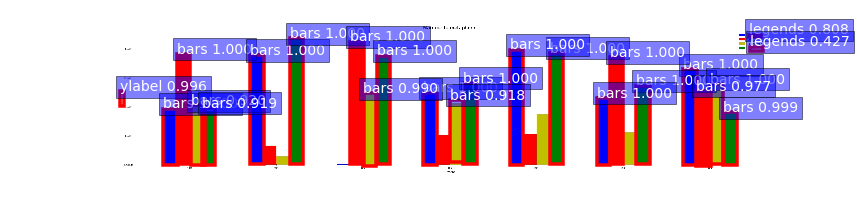

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for ../data/VOCdevkit2018/barcharts2018/JPEGImages/10009.jpg
Variable containing:

Columns 0 to 9 
 0.8927  0.0012  0.0012  0.0012  0.0012  0.5004  0.0012  0.0012  0.0012  0.0012

Columns 10 to 19 
 0.0421  0.0012  0.0012  0.0396  0.0012  0.0012  0.0012  0.0012  0.0012  0.0301

Columns 20 to 29 
 0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0012  0.0299  0.0012  0.0012

Columns 30 to 39 
 0.0012  0.0012  0.0012  0.0012  0.0417  1.2694  0.0218  0.0012  0.4759  0.0012

Columns 40 to 49 
 0.0012  0.0012  0.0012  0.0012  0.2125  0.0012  0.8933  0.0012  0.0012  0.0647

Columns 50 to 59 
 0.0012  0.3231  0.0290  0.0239  0.1888  0.0012  0.0012  0.0435  0.0012  0.0301

Columns 60 to 69 
 0.0274  0.0012  0.0012  0.0012  0.0209  0.0012  0.0012  0.0012  0.0012  0.0892

Columns 70 to 79 
 2.0297  0.0546  0.0012  0.0012  0.0587  0.0012  0.0232  0.0214  0.0012  0.0012

Columns 80 to 89 
 0.0012  0.0012  0.0555  0.0012  0.0012  0.0012  0.0012  0.0046  0.0

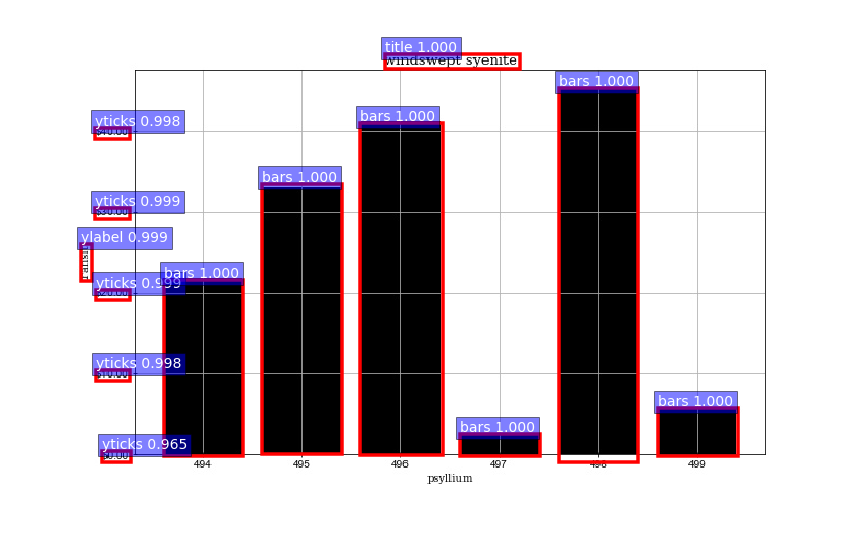

In [14]:
net = net.cuda()
net = net.eval()
    
    #im_names = ['000456.jpg', '000542.jpg', '001150.jpg',
    #            '001763.jpg', '004545.jpg']
im_names = ['1.jpg']
mypath = '../data/VOCdevkit2018/barcharts2018/JPEGImages/'
im_names = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]
#im_names = 
for im_name in im_names[10:20]:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    #print('Demo for data/demo/{}'.format(im_name))
    demo1(net, im_name, CONF_THRESH = 0.3)
    plt.show()